In [1]:
import numpy as np
import os

import csv

from matplotlib import ticker
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from utils.jy_mpl_settings.settings import jy_mpl_rc
from utils.jy_mpl_settings.colors import line_colors
import scqubits as scq
import inspect
import utils.fluxonium_functions as ff
# import utils.scqubits_functions as sf

import utils.resonator_functions as rf
from matplotlib.patches import Rectangle
# from shabanipy.jy_mpl_settings.settings import jy_mpl_rc

import scqubits as scq
import inspect

from matplotlib.ticker import FuncFormatter

import matplotlib.colors as mcolors
colors = ["steelblue", "white"]
cm_blue = mcolors.LinearSegmentedColormap.from_list("white_to_steelblue", colors)
colors = ['lightcoral', "white"]
cm_red = mcolors.LinearSegmentedColormap.from_list("white_to_lightcoral", colors)

plt.style.use(jy_mpl_rc)


# Fig 1a

f01, f02/2, alpha =  1.8348869053315429 4.856211424388258 6.04264903811343


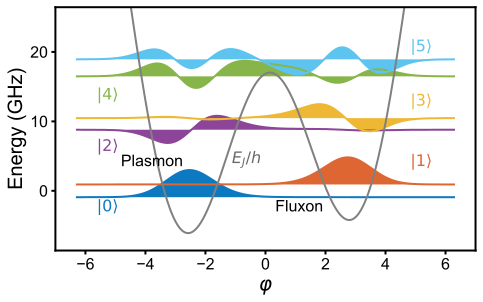

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the necessary functions and imports are defined in `ff` and `scq`
grid = scq.core.discretization.Grid1d(-2*np.pi, 2*np.pi, 1000)

# Superconducting qubit system parameters
El = 2.8
Ej = 17
Ec = .8
phi = 0.48

flux_extent = [-1.5, 1.5]
fl, _ = ff.get_fl(flux_extent, El, Ej, Ec, phi=phi)

# Plot wavefunctions for states 0-5
fig, ax = fl.plot_wavefunction(
    esys=None,
    which=[0, 1, 2, 3, 4, 5],
    mode='real',
    figsize=(7, 4.5),
    scaling=0.5,
    phi_grid=grid
)

# Customize plot limits and labels
plt.xlim(-7, 7)
plt.ylabel('Energy (GHz)')

# Calculate transition frequencies f01, f02, f03, f04
f01, f02, f03, f04 = ff.get_f01(El, Ej, Ec, phi)
print('f01, f02/2, alpha = ', f01, f02 / 2, f02 - 2 * f01)

# Annotate plot with labels for fluxon, plasmon, and states
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(True)

ax.annotate(r'$E_J/h$', xycoords='figure fraction', xy=(0.48, 0.46), fontsize=16, color='dimgray')
ax.annotate(r'Plasmon', xycoords='figure fraction', xy=(0.25, 0.45), fontsize=16)
ax.annotate(r'Fluxon', xycoords='figure fraction', xy=(0.57, 0.30), fontsize=16)

# Annotate energy levels
annotations_data = [
    (r'$|0\rangle$', (0.2, 0.3), line_colors[0]),
    (r'$|2\rangle$', (0.2, 0.5), line_colors[2]),
    (r'$|4\rangle$', (0.2, 0.67), line_colors[4]),
    (r'$|1\rangle$', (0.85, 0.45), line_colors[1]),
    (r'$|3\rangle$', (0.85, 0.65), line_colors[3]),
    (r'$|5\rangle$', (0.85, 0.83), line_colors[5])
]

for label, xy, color in annotations_data:
    ax.annotate(label, xycoords='figure fraction', xy=xy, fontsize=16, color=color)

# # Potential energy plot
# phi_vals = np.linspace(-6, 6, 1001)
# T = 0.99
# potential_2 = El / 2 * (phi_vals)**2 - Ej * 3.2 * np.pi / 4 * np.sqrt(1 - T * np.sin((phi_vals - 2 * np.pi * 0.52) / 2)**2)
# potential_2 -= min(potential_2) + 6

# plt.plot(phi_vals, potential_2, color='grey', linestyle=(0, (3, 3)))  # Uncommented potential plot

# Save the figure
fig.tight_layout()
plt.savefig(f'figs_final/fig1a.pdf', format='pdf')


# Fig 1b

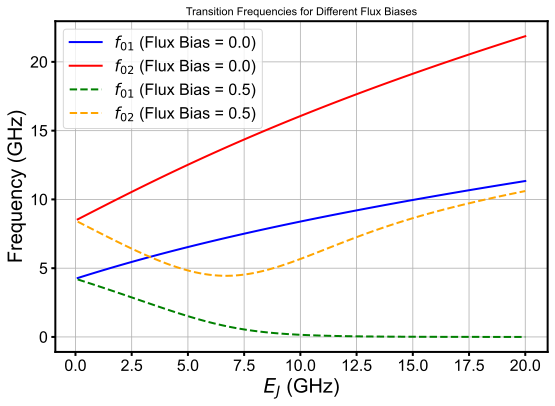

TypeError: unsupported operand type(s) for -: 'list' and 'list'

<Figure size 576x432 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Parameters for the fluxonium system
El = 2.8  # Inductive energy (GHz)
Ec = 0.8  # Charging energy (GHz)
Ej = np.linspace(0.1, 20, 100)  # Range of Josephson energy (GHz)

# Lists to store frequencies
freqs = []
freqs01 = []
freqs02 = []

# Loop over different values of Ej to compute the frequencies f01 and f02
for i, x in enumerate(Ej):
    f01, f02, _, _ = ff.get_f01(El, x, Ec, 0.0)  # Compute f01 and f02 for Phi = 0
    freqs01.append(f01)  # Store f01
    freqs02.append(f02)  # Store f02

# Append the frequency lists to the freqs list
freqs.append(freqs01)
freqs.append(freqs02)

freqs01 = []
freqs02 = []

for i, x in enumerate(Ej):
    f01, f02, _, _ = ff.get_f01(El, x, Ec, 0.5)  # Compute f01 and f02 for Phi = 0
    freqs01.append(f01)  # Store f01
    freqs02.append(f02)  # Store f02

freqs.append(freqs01)
freqs.append(freqs02)

# Plot the frequencies for different flux biases
plt.figure(figsize=(8, 6))

# Flux bias 0.0
plt.plot(Ej, freqs[0], label=r'$f_{01}$ (Flux Bias = 0.0)', color='blue')
plt.plot(Ej, freqs[1], label=r'$f_{02}$ (Flux Bias = 0.0)', color='red')

# Flux bias 0.5
plt.plot(Ej, freqs[2], label=r'$f_{01}$ (Flux Bias = 0.5)', color='green', linestyle='--')
plt.plot(Ej, freqs[3], label=r'$f_{02}$ (Flux Bias = 0.5)', color='orange', linestyle='--')

# Labeling
plt.xlabel(r'$E_J$ (GHz)')
plt.ylabel('Frequency (GHz)')
plt.legend(loc='best')
plt.title('Transition Frequencies for Different Flux Biases')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('frequencies_vs_Ej.png', format='png')

# Show the plot
plt.show()


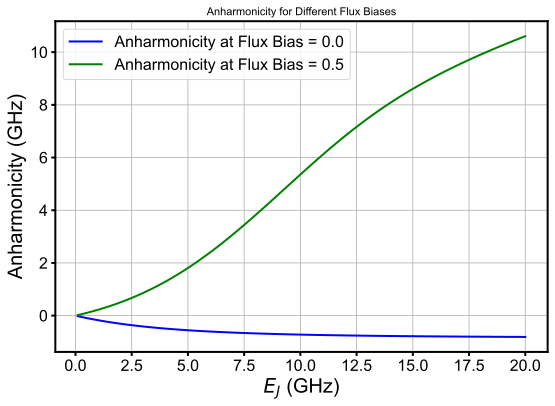

In [11]:

# Plot the anharmonicities
plt.figure(figsize=(8, 6))

anharm_0 = -2*np.array(freqs[0])+np.array(freqs[1])
anharm_5 = -2*np.array(freqs[2])+np.array(freqs[3])

# Anharmonicity vs Ej
plt.plot(Ej, anharm_0, label=r'Anharmonicity at Flux Bias = 0.0', color='blue')
plt.plot(Ej, anharm_5, label=r'Anharmonicity at Flux Bias = 0.5', color='green')

# Labeling
plt.xlabel(r'$E_J$ (GHz)')
plt.ylabel('Anharmonicity (GHz)')
plt.legend(loc='best')
plt.title('Anharmonicity for Different Flux Biases')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('anharmonicity_vs_Ej.png', format='png')

# Show the plot
plt.show()


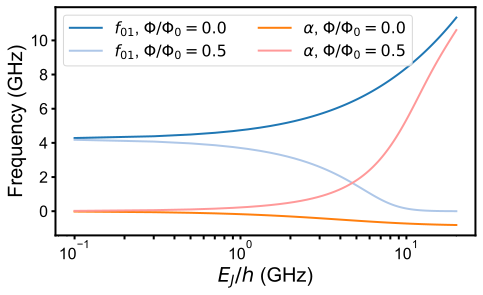

In [12]:
fig, ax = plt.subplots(figsize = (7, 4.5))

# Define color schemes for different curves
blue_colors = ['#1f77b4', '#aec7e8']
red_colors = ['#ff7f0e', '#ff9999']

# Set axis labels
ax.set_ylabel('$f_{01}$ (GHz)')
ax.set_xlabel('$E_J$ (GHz)')

# Plot the data
plt.plot(Ej, freqs[0], label = '$f_{01}$, $\Phi/\Phi_0 = 0.0$', color = blue_colors[0])
plt.plot(Ej, freqs[2], label = '$f_{01}$, $\Phi/\Phi_0 = 0.5$', color = blue_colors[1])
plt.plot(Ej, anharm_0, label = r'$\alpha$, $\Phi/\Phi_0 = 0.0$', color = red_colors[0])
plt.plot(Ej, anharm_5, label = r'$\alpha$, $\Phi/\Phi_0 = 0.5$', color = red_colors[1])

# Set axis labels again to ensure they are correct
ax.set_ylabel(r'Frequency (GHz)')
ax.set_xlabel(r'$E_J/h$ (GHz)')

# Set x-axis to logarithmic scale
plt.xscale('log')

# Define x-ticks for better spacing on a log scale
ax.set_xticks([*np.linspace(.1, .9, 9), *np.linspace(1, 10, 10)])

# Add legend with specific formatting
plt.legend(fontsize = 16, ncol=2)

# Adjust layout for better spacing
fig.tight_layout()

# Save the figure in PDF format
plt.savefig(f'figs_final/fig1b', format = 'pdf')
